## Data Preprocessing

In [ ]:
!pip install duckdb gcsfs tqdm --quiet
from google.colab import auth
auth.authenticate_user()
import duckdb

query = """
SELECT *
FROM 'gs://deep_learning_final_project/model/df_final.parquet'
"""

df_pre = duckdb.query(query).to_df()
print(df_pre.shape)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(4683398, 40)


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_pre.head()

,symbol,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,ATR Value,Upper Band,Middle Band,Lower Band,BB Width,EMA Value,MACD Value,RSI Value,SMA Value,name,exchange,assetType,ipoDate,status,price_trend,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,totalNonCurrentAssets,otherCurrentAssets,totalLiabilities,totalCurrentLiabilities,totalNonCurrentLiabilities,otherCurrentLiabilities,totalShareholderEquity,retainedEarnings,commonStock,commonStockSharesOutstanding
0,A,2010-01-04,31.39,31.63,31.1314,31.30,20.203001,2729300,0.0,1.0,0.3651,20.1246,19.4062,18.6877,0.074043,19.6029,0.3912,73.3122,19.5207,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,0,USD,6.573000e+09,2.897000e+09,1.479000e+09,1.499000e+09,3.676000e+09,283000000.0,4.084000e+09,991000000.0,2.455000e+09,140000000.0,2.489000e+09,2.735000e+09,6000000.0,345000000.0
1,A,2010-01-05,31.21,31.22,30.7600,30.96,19.983544,2994300,0.0,1.0,0.3639,20.1995,19.4417,18.6838,0.077961,19.6537,0.3877,66.2204,19.5663,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,6.573000e+09,2.897000e+09,1.479000e+09,1.499000e+09,3.676000e+09,283000000.0,4.084000e+09,991000000.0,2.455000e+09,140000000.0,2.489000e+09,2.735000e+09,6000000.0,345000000.0
2,A,2010-01-06,30.85,31.00,30.7600,30.85,19.912543,2320300,0.0,1.0,0.3490,20.2540,19.4730,18.6920,0.080214,19.6882,0.3748,64.0613,19.6101,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,6.573000e+09,2.897000e+09,1.479000e+09,1.499000e+09,3.676000e+09,283000000.0,4.084000e+09,991000000.0,2.455000e+09,140000000.0,2.489000e+09,2.735000e+09,6000000.0,345000000.0
3,A,2010-01-07,30.78,30.82,30.5000,30.81,19.886724,2214000,0.0,1.0,0.3402,20.2934,19.5124,18.7313,0.080057,19.7147,0.3584,63.2537,19.6580,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,6.573000e+09,2.897000e+09,1.479000e+09,1.499000e+09,3.676000e+09,283000000.0,4.084000e+09,991000000.0,2.455000e+09,140000000.0,2.489000e+09,2.735000e+09,6000000.0,345000000.0
4,A,2010-01-08,30.64,30.85,30.4000,30.80,19.880270,2670900,0.0,1.0,0.3366,20.3020,19.5624,18.8227,0.075620,19.7367,0.3410,63.0397,19.7207,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,6.573000e+09,2.897000e+09,1.479000e+09,1.499000e+09,3.676000e+09,283000000.0,4.084000e+09,991000000.0,2.455000e+09,140000000.0,2.489000e+09,2.735000e+09,6000000.0,345000000.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Define columns to exclude from input features
exclude_cols = [
    'symbol', 'date', 'name', 'exchange', 'assetType', 'ipoDate', 'status', 'reportedCurrency',
    'high', 'low', 'close', 'adjusted_close', 'volume', 'price_trend'  # also exclude target from input
]

# Step 2: Identify input features to scale
input_features = [col for col in df_pre.columns if col not in exclude_cols]

# Step 3: Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pre[input_features])

# Step 4: Convert to DataFrame with column names
X_scaled_df = pd.DataFrame(X_scaled, columns=input_features)

# Step 5: Merge scaled features back into original dataframe (replace old unscaled versions)
df_processed = df_pre.copy()
df_processed[input_features] = X_scaled_df

# Step 6: Separate target for modeling
df_processed['price_trend'] = df_processed['price_trend'].apply(lambda x: 1 if x == 1 else -1)
y = df_processed['price_trend'].copy()


In [ ]:
# Shape and basic info
print("📊 Full Processed DataFrame shape:", df_processed.shape)
print("\n🧩 Sample of full data with scaled features:")
display(df_processed.head())

# Check that scaling worked
print("\n📏 Scaled feature means (should be ~0):")
print(df_processed[input_features].mean().round(2))

print("\n📐 Scaled feature stds (should be ~1):")
print(df_processed[input_features].std().round(2))

# Target summary
print("\n🎯 Target distribution (price_trend):")
print(y.value_counts())


📊 Full Processed DataFrame shape: (4683398, 40)

🧩 Sample of full data with scaled features:


,symbol,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,ATR Value,Upper Band,Middle Band,Lower Band,BB Width,EMA Value,MACD Value,RSI Value,SMA Value,name,exchange,assetType,ipoDate,status,price_trend,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,totalNonCurrentAssets,otherCurrentAssets,totalLiabilities,totalCurrentLiabilities,totalNonCurrentLiabilities,otherCurrentLiabilities,totalShareholderEquity,retainedEarnings,commonStock,commonStockSharesOutstanding
0,A,2010-01-04,-0.029341,31.63,31.1314,31.30,20.203001,2729300,-0.018275,-0.002365,-0.031762,-0.029575,-0.029420,-0.029243,-0.564596,-0.029387,-0.006337,1.761798,-0.029397,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,-0.147302,-0.096664,-0.034209,-0.063753,-0.094416,-0.05723,-0.137236,-0.162132,-0.046765,-0.088375,-0.156952,-0.071445,-0.02292,-0.004423
1,A,2010-01-05,-0.029360,31.22,30.7600,30.96,19.983544,2994300,-0.018275,-0.002365,-0.031769,-0.029567,-0.029416,-0.029243,-0.533161,-0.029382,-0.006367,1.176075,-0.029392,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,-0.147302,-0.096664,-0.034209,-0.063753,-0.094416,-0.05723,-0.137236,-0.162132,-0.046765,-0.088375,-0.156952,-0.071445,-0.02292,-0.004423
2,A,2010-01-06,-0.029397,31.00,30.7600,30.85,19.912543,2320300,-0.018275,-0.002365,-0.031864,-0.029562,-0.029413,-0.029242,-0.515090,-0.029379,-0.006479,0.997751,-0.029388,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,-0.147302,-0.096664,-0.034209,-0.063753,-0.094416,-0.05723,-0.137236,-0.162132,-0.046765,-0.088375,-0.156952,-0.071445,-0.02292,-0.004423
3,A,2010-01-07,-0.029405,30.82,30.5000,30.81,19.886724,2214000,-0.018275,-0.002365,-0.031920,-0.029558,-0.029409,-0.029238,-0.516348,-0.029376,-0.006620,0.931050,-0.029383,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,-0.147302,-0.096664,-0.034209,-0.063753,-0.094416,-0.05723,-0.137236,-0.162132,-0.046765,-0.088375,-0.156952,-0.071445,-0.02292,-0.004423
4,A,2010-01-08,-0.029419,30.85,30.4000,30.80,19.880270,2670900,-0.018275,-0.002365,-0.031943,-0.029557,-0.029404,-0.029228,-0.551949,-0.029373,-0.006771,0.913375,-0.029376,Agilent Technologies Inc,NYSE,Stock,1999-11-18,Active,-1,USD,-0.147302,-0.096664,-0.034209,-0.063753,-0.094416,-0.05723,-0.137236,-0.162132,-0.046765,-0.088375,-0.156952,-0.071445,-0.02292,-0.004423



📏 Scaled feature means (should be ~0):
open                                     0.0
dividend_amount                         -0.0
split_coefficient                        0.0
ATR Value                                0.0
Upper Band                               0.0
Middle Band                              0.0
Lower Band                               0.0
BB Width                                -0.0
EMA Value                               -0.0
MACD Value                              -0.0
RSI Value                               -0.0
SMA Value                               -0.0
totalAssets                             -0.0
totalCurrentAssets                      -0.0
cashAndCashEquivalentsAtCarryingValue   -0.0
cashAndShortTermInvestments             -0.0
totalNonCurrentAssets                    0.0
otherCurrentAssets                       0.0
totalLiabilities                         0.0
totalCurrentLiabilities                  0.0
totalNonCurrentLiabilities               0.0
otherCurrentLia

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

# Sort chronologically by date (if not already sorted)
df_processed = df_processed.sort_values('date').reset_index(drop=True)

# Extract features and target again
X = df_processed[input_features].copy()
y = df_processed['price_trend'].copy()

# Split based on date order (60% train, 20% val, 20% test)
n = len(X)
train_end = int(n * 0.6)
val_end = int(n * 0.8)

X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_val, y_val     = X.iloc[train_end:val_end], y.iloc[train_end:val_end]
X_test, y_test   = X.iloc[val_end:], y.iloc[val_end:]

from sklearn.impute import SimpleImputer

# Use mean imputation
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check sizes
print("✅ Split complete:")
print(f"  Train: {X_train.shape},  Validation: {X_val.shape},  Test: {X_test.shape}")


✅ Split complete:
  Train: (2810038, 26),  Validation: (936680, 26),  Test: (936680, 26)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


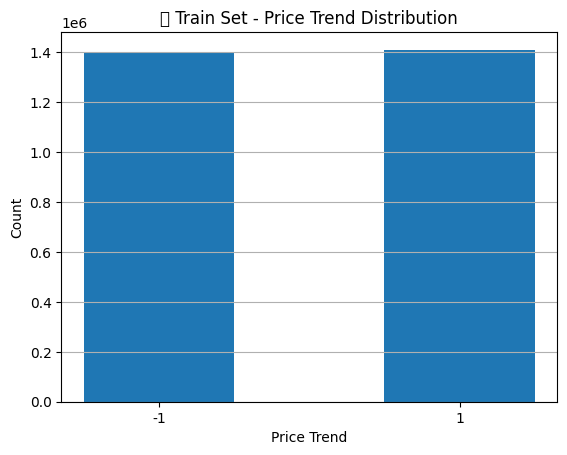

price_trend
-1    1399179
 1    1410859
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


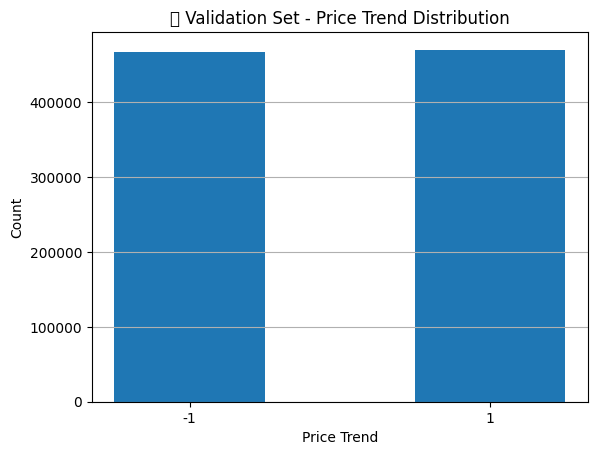

price_trend
-1    466611
 1    470069
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


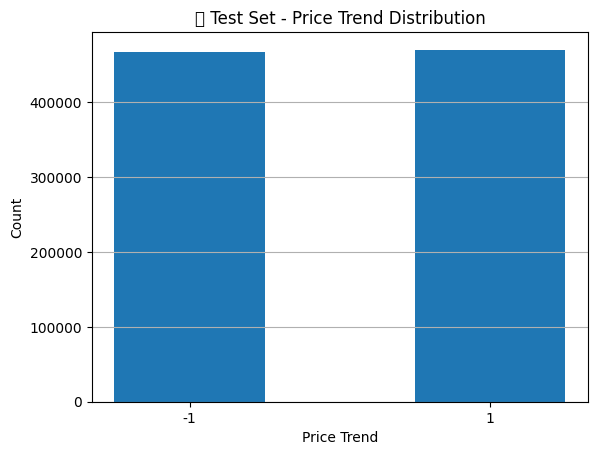

price_trend
-1    466496
 1    470184
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

def plot_target_distribution(y, title):
    counts = y.value_counts().sort_index()
    labels = counts.index.astype(str)
    plt.bar(labels, counts, width=0.5)
    plt.title(title)
    plt.xlabel("Price Trend")
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.show()
    print(counts)

# Plot and show value counts
plot_target_distribution(y_train, "📊 Train Set - Price Trend Distribution")
plot_target_distribution(y_val, "📊 Validation Set - Price Trend Distribution")
plot_target_distribution(y_test, "📊 Test Set - Price Trend Distribution")


## Traditional Statistical Models

### PCA logistic regression V.S. Standard Logistic Regression (no PCA)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.impute import SimpleImputer
# import pandas as pd
# import matplotlib.pyplot as plt

# # ✅ Step 1: Handle missing values (mean imputation)
# imputer = SimpleImputer(strategy="mean")
# X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# X_val_imp = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
# X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# # ✅ Step 2: PCA + Logistic Regression
# pca = PCA(n_components=0.95, random_state=42)
# X_train_pca = pca.fit_transform(X_train_imp)
# X_val_pca = pca.transform(X_val_imp)
# X_test_pca = pca.transform(X_test_imp)

# logit_pca = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
# logit_pca.fit(X_train_pca, y_train)

# # Training predictions
# y_train_pred_pca = logit_pca.predict(X_train_pca)
# y_train_proba_pca = logit_pca.predict_proba(X_train_pca)[:, 1]

# # Validation predictions
# y_val_pred_pca = logit_pca.predict(X_val_pca)
# y_val_proba_pca = logit_pca.predict_proba(X_val_pca)[:, 1]

# # Test predictions
# y_test_pred_pca = logit_pca.predict(X_test_pca)
# y_test_proba_pca = logit_pca.predict_proba(X_test_pca)[:, 1]

# # ✅ Step 3: Standard Logistic Regression (no PCA)
# logit_full = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
# logit_full.fit(X_train_imp, y_train)

# # Training predictions
# y_train_pred_full = logit_full.predict(X_train_imp)
# y_train_proba_full = logit_full.predict_proba(X_train_imp)[:, 1]

# # Validation predictions
# y_val_pred_full = logit_full.predict(X_val_imp)
# y_val_proba_full = logit_full.predict_proba(X_val_imp)[:, 1]

# # Test predictions
# y_test_pred_full = logit_full.predict(X_test_imp)
# y_test_proba_full = logit_full.predict_proba(X_test_imp)[:, 1]

# # ✅ Step 4: Evaluation
# print("\n🎯 PCA + Logistic Regression — Train:")
# print(confusion_matrix(y_train, y_train_pred_pca))
# print(classification_report(y_train, y_train_pred_pca))
# print(f"AUC: {roc_auc_score(y_train, y_train_proba_pca):.4f}")

# print("\n🎯 PCA + Logistic Regression — Validation:")
# print(confusion_matrix(y_val, y_val_pred_pca))
# print(classification_report(y_val, y_val_pred_pca))
# print(f"AUC: {roc_auc_score(y_val, y_val_proba_pca):.4f}")

# print("\n🎯 PCA + Logistic Regression — Test:")
# print(confusion_matrix(y_test, y_test_pred_pca))
# print(classification_report(y_test, y_test_pred_pca))
# print(f"AUC: {roc_auc_score(y_test, y_test_proba_pca):.4f}")

# print("\n🎯 Standard Logistic Regression (no PCA) — Train:")
# print(confusion_matrix(y_train, y_train_pred_full))
# print(classification_report(y_train, y_train_pred_full))
# print(f"AUC: {roc_auc_score(y_train, y_train_proba_full):.4f}")

# print("\n🎯 Standard Logistic Regression (no PCA) — Validation:")
# print(confusion_matrix(y_val, y_val_pred_full))
# print(classification_report(y_val, y_val_pred_full))
# print(f"AUC: {roc_auc_score(y_val, y_val_proba_full):.4f}")

# print("\n🎯 Standard Logistic Regression (no PCA) — Test:")
# print(confusion_matrix(y_test, y_test_pred_full))
# print(classification_report(y_test, y_test_pred_full))
# print(f"AUC: {roc_auc_score(y_test, y_test_proba_full):.4f}")

# # ✅ Step 5: Plot ROC curves on test set
# fpr_pca, tpr_pca, _ = roc_curve(y_test, y_test_proba_pca)
# fpr_full, tpr_full, _ = roc_curve(y_test, y_test_proba_full)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_pca, tpr_pca, label='PCA + Logistic Regression')
# plt.plot(fpr_full, tpr_full, label='Standard Logistic Regression')
# plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve on Test Set')
# plt.legend()
# plt.grid(True)
# plt.show()


#### Analysis
The model is stable and generalizes consistently across train, validation, and test sets.

AUC around 0.65 indicates the model has some ability to distinguish between classes (better than random guess of 0.5), but far from strong.

PCA vs. No PCA
Both models perform nearly identically.

PCA did not improve performance significantly (maybe even dropped very slightly).

That’s expected since logistic regression is already a linear model, and PCA is a linear projection.

🧠 Takeaway: PCA may help with dimensionality reduction or collinearity, but not much value-add in performance here.

### Machine Learning: XGBoost, LightGBM, SVM

In [ ]:
# If LightGBM is not installed
!pip install lightgbm xgboost --quiet


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.svm import SVC
# import xgboost as xgb
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# import pandas as pd

# # 🔁 Fix target labels for XGBoost & LightGBM (require 0 and 1)
# y_train_bin = y_train.replace({-1: 0, 1: 1})
# y_val_bin = y_val.replace({-1: 0, 1: 1})
# y_test_bin = y_test.replace({-1: 0, 1: 1})

# # ✅ Train XGBoost
# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_clf.fit(X_train_imp, y_train_bin)
# y_test_pred_xgb = xgb_clf.predict(X_test_imp)
# y_test_proba_xgb = xgb_clf.predict_proba(X_test_imp)[:, 1]

# # ✅ Train LightGBM
# lgb_clf = lgb.LGBMClassifier(random_state=42)
# lgb_clf.fit(X_train_imp, y_train_bin)
# y_test_pred_lgb = lgb_clf.predict(X_test_imp)
# y_test_proba_lgb = lgb_clf.predict_proba(X_test_imp)[:, 1]

# # ✅ Train SVM (limited to subset for performance)
# svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
# svm_clf.fit(X_train_imp[:10000], y_train_bin[:10000])
# y_test_pred_svm = svm_clf.predict(X_test_imp[:10000])
# y_test_proba_svm = svm_clf.predict_proba(X_test_imp[:10000])[:, 1]

# # ✅ Display evaluation metrics
# print("\n🎯 XGBoost — Test:")
# print(classification_report(y_test_bin, y_test_pred_xgb))
# print("AUC:", roc_auc_score(y_test_bin, y_test_proba_xgb))

# print("\n🎯 LightGBM — Test:")
# print(classification_report(y_test_bin, y_test_pred_lgb))
# print("AUC:", roc_auc_score(y_test_bin, y_test_proba_lgb))

# print("\n🎯 SVM (10k subset) — Test:")
# print(classification_report(y_test_bin[:10000], y_test_pred_svm))
# print("AUC:", roc_auc_score(y_test_bin[:10000], y_test_proba_svm))

# # ✅ Plot ROC curves
# fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, y_test_proba_xgb)
# fpr_lgb, tpr_lgb, _ = roc_curve(y_test_bin, y_test_proba_lgb)
# fpr_svm, tpr_svm, _ = roc_curve(y_test_bin[:10000], y_test_proba_svm)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
# plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
# plt.plot(fpr_svm, tpr_svm, label='SVM (10k subset)')
# plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison')
# plt.legend()
# plt.grid(True)
# plt.show()


### Try hyperparameter tuning on XGBoost/LightGBM

In [ ]:
# # 📦 Import libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score
# from scipy.stats import uniform, randint
# import xgboost as xgb
# import lightgbm as lgb

# # 🔁 Make sure your labels are 0/1
# y_train_bin = y_train.replace({-1: 0, 1: 1})
# y_test_bin = y_test.replace({-1: 0, 1: 1})

# # ✅ Define XGBoost parameter grid
# xgb_param_grid = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.2),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4)
# }

# # ✅ XGBoost tuning
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_search = RandomizedSearchCV(
#     xgb_model, xgb_param_grid,
#     n_iter=10, scoring='roc_auc', cv=3,
#     verbose=1, n_jobs=-1, random_state=42
# )
# xgb_search.fit(X_train_imp, y_train_bin)
# best_xgb = xgb_search.best_estimator_

# # ✅ Define LightGBM parameter grid
# lgb_param_grid = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.2),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4)
# }

# # ✅ LightGBM tuning
# lgb_model = lgb.LGBMClassifier(random_state=42)
# lgb_search = RandomizedSearchCV(
#     lgb_model, lgb_param_grid,
#     n_iter=10, scoring='roc_auc', cv=3,
#     verbose=1, n_jobs=-1, random_state=42
# )
# lgb_search.fit(X_train_imp, y_train_bin)
# best_lgb = lgb_search.best_estimator_

# # ✅ Evaluate on test set
# def evaluate_model(name, model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]
#     auc = roc_auc_score(y_test, y_proba)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     print(f"\n🎯 {name} — Test Performance")
#     print(classification_report(y_test, y_pred))
#     print(f"AUC: {auc:.4f}")
#     return {
#         'Model': name,
#         'Test AUC': auc,
#         'Test Accuracy': report['accuracy'],
#         'Test F1 Score': report['weighted avg']['f1-score']
#     }

# # ✅ Run evaluation
# xgb_results = evaluate_model("Tuned XGBoost", best_xgb, X_test_imp, y_test_bin)
# lgb_results = evaluate_model("Tuned LightGBM", best_lgb, X_test_imp, y_test_bin)

# # ✅ Summary Table
# results_df = pd.DataFrame([xgb_results, lgb_results])
# results_df


## Deep Learning Model Tuning

Deep Feedforward Neural Network (DenseNet) with BatchNormalization, Dropout, and class balancing.

SHAP visualization using XGBoost to identify important features.

Optional TabNet model (with fallback if the library isn't installed).

A note about FT-Transformer, which requires additional setup via AutoGluon or HuggingFace Tabular.

Epoch 1/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - AUC: 0.6788 - accuracy: 0.6274 - loss: 0.6476 - val_AUC: 0.7167 - val_accuracy: 0.6258 - val_loss: 0.6400 - learning_rate: 0.0010
Epoch 2/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - AUC: 0.7407 - accuracy: 0.6762 - loss: 0.5990 - val_AUC: 0.7165 - val_accuracy: 0.6399 - val_loss: 0.6399 - learning_rate: 0.0010
Epoch 3/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - AUC: 0.7465 - accuracy: 0.6805 - loss: 0.5938 - val_AUC: 0.7189 - val_accuracy: 0.6342 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 4/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - AUC: 0.7494 - accuracy: 0.6827 - loss: 0.5913 - val_AUC: 0.7292 - val_accuracy: 0.6458 - val_loss: 0.6342 - learning_rate: 0.0010
Epoch 5/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - AUC: 0.7502 - accuracy: 0.6829 - loss: 0.5905 - val_AUC: 0.7165 - val_accuracy: 0.6566 - val_loss: 0.6309 - learning_rate: 0.0010
Epoch 6/50
10977/10977 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/ste

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:09:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


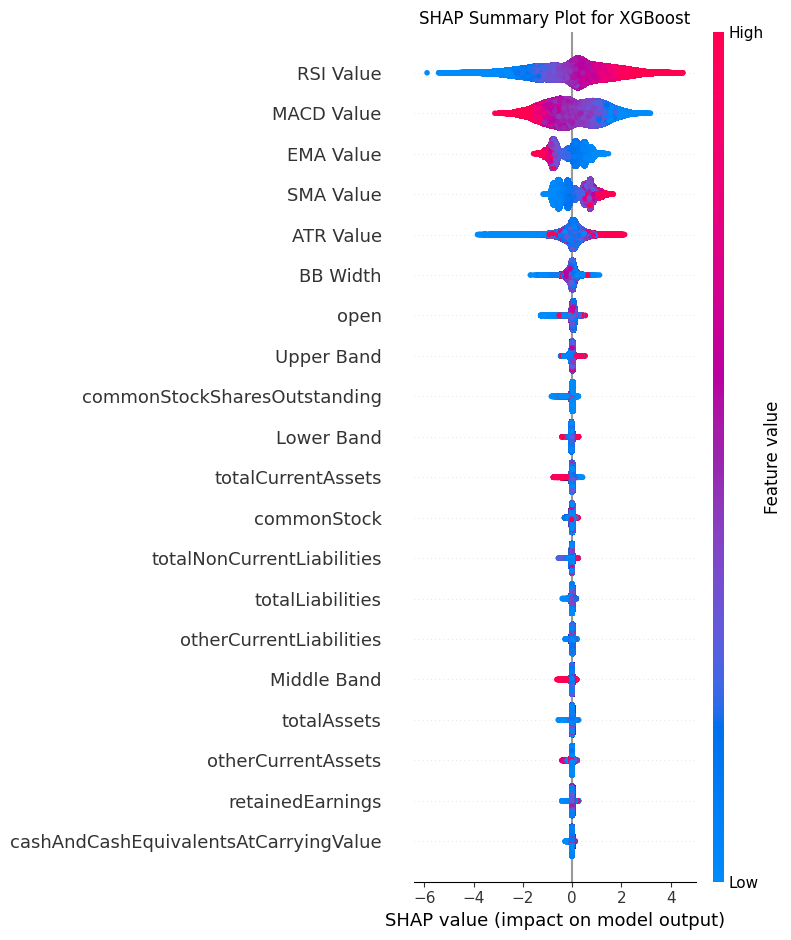

TabNet is not installed. To use it, install with: pip install pytorch-tabnet

FT-Transformer requires specialized setup. Use libraries like AutoGluon or HuggingFace Tabular for implementation.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# === STEP 1: Preprocess Tabular Data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Binary targets
y_train_bin = y_train.replace({-1: 0, 1: 1}).values
y_val_bin = y_val.replace({-1: 0, 1: 1}).values
y_test_bin = y_test.replace({-1: 0, 1: 1}).values

# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_bin)
class_weights = {0: weights[0], 1: weights[1]}

# === STEP 2: Deep Feedforward Model (DenseNet) ===
dnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
dnn_model.fit(
    X_train_scaled, y_train_bin,
    validation_data=(X_val_scaled, y_val_bin),
    epochs=50, batch_size=256,
    callbacks=[EarlyStopping(patience=5), ReduceLROnPlateau(patience=2)],
    class_weight=class_weights,
    verbose=1
)

# Evaluate on test
y_pred_dnn = dnn_model.predict(X_test_scaled).ravel()
y_label_dnn = (y_pred_dnn >= 0.5).astype(int)
print("\n📊 DenseNet Results:")
print(classification_report(y_test_bin, y_label_dnn))
print(f"AUC: {roc_auc_score(y_test_bin, y_pred_dnn):.4f}")

# === STEP 3: SHAP on XGBoost ===
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train_bin)

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train, show=False)
plt.title("SHAP Summary Plot for XGBoost")
plt.tight_layout()
plt.show()

# === STEP 4: Optional - Try TabNet or FT-Transformer (if torch/tabnet installed) ===
# 📦 Required installation:
# pip install pytorch-tabnet
# pip install torch torchvision torchaudio
try:
    from pytorch_tabnet.tab_model import TabNetClassifier
    from sklearn.model_selection import train_test_split

    X_train_tabnet, X_valid_tabnet, y_train_tabnet, y_valid_tabnet = train_test_split(
        X_train_scaled, y_train_bin, test_size=0.2, random_state=42)

    tabnet = TabNetClassifier(verbose=1, seed=42)
    tabnet.fit(X_train_tabnet, y_train_tabnet,
               eval_set=[(X_valid_tabnet, y_valid_tabnet)],
               eval_metric=['auc'], max_epochs=50,
               patience=5, batch_size=1024)

    y_pred_tabnet = tabnet.predict_proba(X_test_scaled)[:, 1]
    print("\n📊 TabNet Results:")
    print(classification_report(y_test_bin, (y_pred_tabnet >= 0.5).astype(int)))
    print(f"AUC: {roc_auc_score(y_test_bin, y_pred_tabnet):.4f}")

except ImportError:
    print("TabNet is not installed. To use it, install with: pip install pytorch-tabnet")

# === Placeholder for FT-Transformer ===
print("\nFT-Transformer requires specialized setup. Use libraries like AutoGluon or HuggingFace Tabular for implementation.")


### Deep Learning: LSTMs, CNNs, Autoencoders


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, Bidirectional, Conv1D, MaxPooling1D,
                                     GlobalMaxPooling1D, Flatten, Dropout, Dense,
                                     Input, LayerNormalization, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# === STEP 1: Sequence Preparation for LSTM/CNN ===
def create_sequences(X, y, sequence_length=10):
    X_seq, y_seq = [], []
    for i in range(sequence_length, len(X)):
        X_seq.append(X[i-sequence_length:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# Combine and scale
total_data = pd.concat([X_train, X_val, X_test])
total_labels = pd.concat([y_train, y_val, y_test])
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(total_data)
y_all_bin = total_labels.replace({-1: 0, 1: 1}).values

# Create sequences
seq_len = 10
X_seq, y_seq = create_sequences(X_all_scaled, y_all_bin)

# Align split sizes with original
n_train = len(X_train) - seq_len
n_val = len(X_val)
n_test = len(X_test)

X_train_seq = X_seq[:n_train]
y_train_seq = y_seq[:n_train]
X_val_seq = X_seq[n_train:n_train+n_val]
y_val_seq = y_seq[n_train:n_train+n_val]
X_test_seq = X_seq[n_train+n_val:]
y_test_seq = y_seq[n_train+n_val:]

# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_seq)
class_weights = {0: weights[0], 1: weights[1]}

# === STEP 2: Improved LSTM Model ===
lstm_model = Sequential([
    Input(shape=(seq_len, X_seq.shape[2])),
    LayerNormalization(),
    Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.2)),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy', 'AUC'])
lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50, batch_size=128,
    callbacks=[EarlyStopping(patience=5), ReduceLROnPlateau(patience=2)],
    class_weight=class_weights,
    verbose=1
)
y_pred_lstm = lstm_model.predict(X_test_seq).ravel()
y_label_lstm = (y_pred_lstm >= 0.5).astype(int)
print("\n\U0001F4CA LSTM Results:")
print(classification_report(y_test_seq, y_label_lstm))
print(f"AUC: {roc_auc_score(y_test_seq, y_pred_lstm):.4f}")

# === STEP 3: Improved CNN Model ===
cnn_model = Sequential([
    Input(shape=(seq_len, X_seq.shape[2])),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', 'AUC'])
cnn_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50, batch_size=128,
    callbacks=[EarlyStopping(patience=5), ReduceLROnPlateau(patience=2)],
    class_weight=class_weights,
    verbose=1
)
y_pred_cnn = cnn_model.predict(X_test_seq).ravel()
y_label_cnn = (y_pred_cnn >= 0.5).astype(int)
print("\n\U0001F4CA CNN Results:")
print(classification_report(y_test_seq, y_label_cnn))
print(f"AUC: {roc_auc_score(y_test_seq, y_pred_cnn):.4f}")

# === STEP 4: Denoising Autoencoder for Anomaly Detection ===
X_train_tab = scaler.fit_transform(X_train)
X_val_tab = scaler.transform(X_val)
X_test_tab = scaler.transform(X_test)

# Add noise for denoising AE
X_train_noisy = X_train_tab + 0.01 * np.random.normal(size=X_train_tab.shape)

input_dim = X_train_tab.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_layer)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(32, activation="relu")(encoded)
decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(
    X_train_noisy, X_train_tab,
    validation_data=(X_val_tab, X_val_tab),
    epochs=50, batch_size=256,
    callbacks=[EarlyStopping(patience=5), ReduceLROnPlateau(patience=2)],
    verbose=1
)

# Evaluate Autoencoder
reconstructions = autoencoder.predict(X_test_tab)
mse = np.mean(np.power(X_test_tab - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 80)  # top 20% as anomaly
y_pred_auto = (mse > threshold).astype(int)
y_true_auto = y_test.replace({-1: 0, 1: 1}).values

print("\n\U0001F4CA Autoencoder Results:")
print(classification_report(y_true_auto, y_pred_auto))
print(f"AUC (based on MSE): {roc_auc_score(y_true_auto, mse):.4f}")
